In [12]:
from rotation import get_xyz
from kitaev_ladder import load_data
import numpy as np
import matplotlib.pyplot as plt

In [9]:
a_step = 0.05
b_step = 0.05

chi = 100
L = 3
N_sweeps_check=1
max_sweeps=20
verbose=0
# folder name
prefix = f'data_L_{L}_comb/'

In [14]:
def any_J_equal_zero(Jx, Jy, Jz):
    return (Jx == 0 or Jy == 0 or Jz == 0)

def f(a, b):
    
    Jx, Jy, Jz = get_xyz(a, b, biased=False)
    
    if any_J_equal_zero(Jx, Jy, Jz):
        return np.nan
    
    data = load_data(chi=chi, Jx=Jx, Jy=Jy, Jz=Jz, L=L, prefix=prefix)
    if data==-1:
        return np.nan
    psi = data['psi']
    
    sweeps_stat = data['sweeps_stat']
#     print("Sweeps: ", sweeps_stat['sweep'])
    last_sweep = len(sweeps_stat['sweep']) * N_sweeps_check
    max_sweeps = data['parameters']['max_sweeps']
    return float(np.mean(psi.entanglement_entropy()))
    if max_sweeps == last_sweep:
        return np.nan
    else:
        return float(np.mean(psi.entanglement_entropy()))

ff = np.frompyfunc(f, 2, 1)

a = np.arange(-1, 1+a_step, a_step)
b = np.arange(-1, 1+b_step, b_step)

A, B = np.meshgrid(a, b)
print(B)

[[-1.   -1.   -1.   ... -1.   -1.   -1.  ]
 [-0.95 -0.95 -0.95 ... -0.95 -0.95 -0.95]
 [-0.9  -0.9  -0.9  ... -0.9  -0.9  -0.9 ]
 ...
 [ 0.9   0.9   0.9  ...  0.9   0.9   0.9 ]
 [ 0.95  0.95  0.95 ...  0.95  0.95  0.95]
 [ 1.    1.    1.   ...  1.    1.    1.  ]]


In [15]:
entangle = ff(A, B)
print(entangle)

[[nan nan nan ... nan nan nan]
 [nan nan 0.8673588761802186 ... 0.8673588761802243 nan nan]
 [nan 0.8673588761800729 nan ... nan 0.8673588761802075 nan]
 ...
 [nan 0.8673588761802238 nan ... nan 0.8673588761802193 nan]
 [nan nan 0.8673588761802059 ... 0.8673588761802268 nan nan]
 [nan nan nan ... nan nan nan]]


Text(0, 0.5, '$b$')

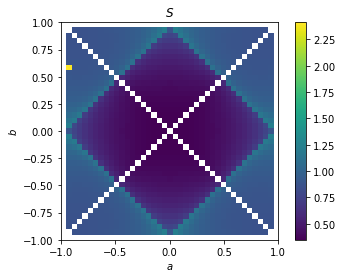

In [16]:
Z = entangle
Z = np.vstack(Z[:, :]).astype(np.float)
plt.imshow(Z, extent=[a[0], a[-1], b[0], b[-1]], origin='lower',
           cmap='viridis')
plt.colorbar()
plt.axis(aspect='image')
plt.title(r"$S$")
plt.xlabel(r'$a$')
plt.ylabel(r'$b$')
# plt.savefig(f'entanglement entropy L={L}.png')

Find the large point looking yellow

In [22]:
test = Z[:, 1]
x = test > 2
i = 0
for x0 in x:
    if x0 == True:
        print(i)
        pass
    i += 1
    pass

32


In [25]:
Z[32, 1]
print("A: ", A[32, 1])
print("B: ", B[32, 1])

A:  -0.95
B:  0.6000000000000014


Try directly do the computation

In [26]:
from kitaev_ladder import run_atomic

In [34]:
Jx, Jy, Jz = get_xyz(-0.95, 0.6)
result = run_atomic(
    Jx=Jx,
    Jy=Jy,
    Jz=Jz,
    L=3,
    chi=100,
    max_S_err=1e-5
)

parameter 'verbose'=1 for KitaevLadderModel
parameter 'L'=3 for KitaevLadderModel
parameter 'conserve'=None for KitaevLadderModel
parameter 'Jx'=-0.175 for KitaevLadderModel
parameter 'Jy'=-0.775 for KitaevLadderModel
parameter 'Jz'=0.05 for KitaevLadderModel


==============================START==============================
Chi =  100 

parameter 'verbose'=1 for Sweep
parameter 'trunc_params'={'chi_max': 4, 'svd_min': 1e-10} for Sweep
Initial sweeps...
parameter 'start_env'=10 for Sweep
Updating environment
..........
parameter 'N_sweeps_check'=10 for DMRG
parameter 'max_sweeps'=200 for DMRG
parameter 'max_E_err'=1e-06 for DMRG
parameter 'max_S_err'=1e-05 for DMRG
parameter 'mixer'=True for Sweep
parameter 'mixer_params'={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50} for Sweep
Updating environment
.....
sweep 10, age = 612
Energy = -0.0982236500731416, S = nan, norm_err = 1.8e-09
Current memory usage 308.3 MB, time elapsed: 33.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2174: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2195: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999873-2.1503318307801547e-17j)
After the canonicalization:
Bond dim =  [76, 88, 77, 90, 82, 100, 87, 97, 82, 96, 80, 91]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================


In [ ]:
Jx, Jy, Jz = get_xyz(-0.95, 0.6 - b_step)
result = run_atomic(
    Jx=Jx,
    Jy=Jy,
    Jz=Jz,
    L=2,
    chi=100,
    max_S_err=1e-5
)
psi = result['psi']
S = np.mean(psi.entanglement_entropy())
S

parameter 'verbose'=1 for KitaevLadderModel
parameter 'L'=2 for KitaevLadderModel
parameter 'conserve'=None for KitaevLadderModel
parameter 'Jx'=-0.2 for KitaevLadderModel
parameter 'Jy'=-0.75 for KitaevLadderModel
parameter 'Jz'=0.05 for KitaevLadderModel


==============================START==============================
Chi =  100 

parameter 'verbose'=1 for Sweep
parameter 'trunc_params'={'chi_max': 4, 'svd_min': 1e-10} for Sweep
Initial sweeps...
parameter 'start_env'=10 for Sweep
Updating environment
..........
parameter 'N_sweeps_check'=10 for DMRG
parameter 'max_sweeps'=200 for DMRG
parameter 'max_E_err'=1e-06 for DMRG
parameter 'max_S_err'=1e-05 for DMRG
parameter 'mixer'=True for Sweep
parameter 'mixer_params'={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50} for Sweep
Updating environment
.....
sweep 10, age = 408
Energy = -0.0955443848297606, S = nan, norm_err = 3.2e-09
Current memory usage 328.1 MB, time elapsed: 23.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep

In [37]:
initial_psi = load_data()

1.5823014736494343

Text(0, 0.5, '$b$')

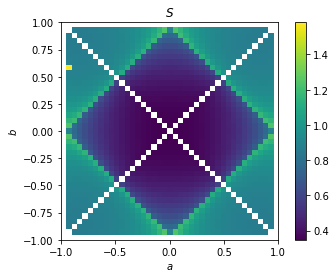

In [36]:
Z[32, 1] = S
plt.imshow(Z, extent=[a[0], a[-1], b[0], b[-1]], origin='lower',
           cmap='viridis')
plt.colorbar()
plt.axis(aspect='image')
plt.title(r"$S$")
plt.xlabel(r'$a$')
plt.ylabel(r'$b$')